In [ ]:
#importing all basic libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import all data from my drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
file_name = '/content/drive/MyDrive/Machine Learning/Capstone Project/SVHN_single_grey1.h5'
df = h5py.File(file_name,'r+')
data = np.array(df)

In [ ]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
#convert all image from .h5 to numpy array
test_x = np.array(df['X_test'])
train_x = np.array(df['X_train'])
val_x = np.array(df['X_val'])

test_y = np.array(df['y_test'])
train_y = np.array(df['y_train'])
val_y = np.array(df['y_val'])

In [ ]:
print(type(test_x))
print(type(train_x))
print(type(val_x))
print(type(test_y))
print(type(train_y))
print(type(val_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_x[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [ ]:
train_x[0].max()

0.5117341

In [ ]:
train_x[0].shape

(32, 32)

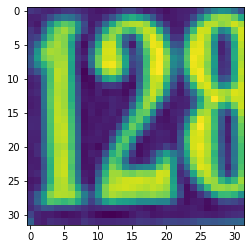

In [ ]:
plt.imshow(train_x[0])

In [ ]:
(1, 32, 32, 1)

In [ ]:
train_y[0]

2

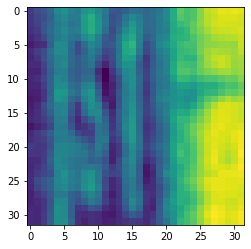

In [ ]:
plt.imshow(test_x[0])

In [ ]:
test_y[0]

1

In [ ]:
val_x[0]

array([[0.17372157, 0.18039177, 0.20129648, ..., 0.09912314, 0.10790196,
        0.10649412],
       [0.19268668, 0.23650236, 0.274989  , ..., 0.09294195, 0.09897177,
        0.09526196],
       [0.23827255, 0.3282906 , 0.40076903, ..., 0.09609569, 0.09792628,
        0.08961255],
       ...,
       [0.2631655 , 0.36567214, 0.42824197, ..., 0.10448784, 0.09647647,
        0.09004196],
       [0.09708589, 0.14369294, 0.19179255, ..., 0.08598745, 0.0844349 ,
        0.08450156],
       [0.08885647, 0.08930353, 0.10692784, ..., 0.0840902 , 0.08164353,
        0.07874981]], dtype=float32)

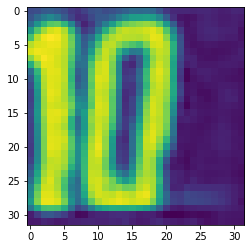

In [ ]:
plt.imshow(val_x[0])

In [ ]:
val_y[0]

0

In [ ]:
#train_x = train_x/255.
#test_x = test_x/255.
#val_x = val_x/255.

In [ ]:
train_x

array([[[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 ,
         0.2283153 , 0.16860352],
        [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 ,
         0.40534863, 0.33056822],
        [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473,
         0.47754902, 0.45263842],
        ...,
        [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059,
         0.09840274, 0.10219726],
        [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294,
         0.11556196, 0.11790627],
        [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727,
         0.19942354, 0.20799099]],

       [[0.34101608, 0.3414451 , 0.34656274, ..., 0.3600055 ,
         0.35195178, 0.3628635 ],
        [0.33995295, 0.340829  , 0.34287727, ..., 0.35580626,
         0.3419765 , 0.34730548],
        [0.33711922, 0.33652744, 0.33695647, ..., 0.25044155,
         0.23458785, 0.21521765],
        ...,
        [0.35381806, 0.35703844, 0.3665243 , ..., 0.21707255,
         0.19051842, 0.17276745],
        [0.3

### Create first model and fit with train dataset.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 73s 54ms/step - loss: 1.0315 - accuracy: 0.6751
Epoch 2/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.5455 - accuracy: 0.8482
Epoch 3/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.4778 - accuracy: 0.8675
Epoch 4/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.4298 - accuracy: 0.8793
Epoch 5/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.3907 - accuracy: 0.8897
Epoch 6/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.3589 - accuracy: 0.8984
Epoch 7/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.3326 - accuracy: 0.9038
Epoch 8/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.3116 - accuracy: 0.9085
Epoch 9/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.2886 - accuracy: 0.9161
Epoch 10/10
1313/1313 [==============================] - 62s 47m

In [ ]:
model.evaluate(val_x, val_y)

1875/1875 [==============================] - 29s 16ms/step - loss: 0.2979 - accuracy: 0.9141


[0.29785868525505066, 0.9140999913215637]

In [ ]:
model.evaluate(test_x, test_y)

563/563 [==============================] - 10s 18ms/step - loss: 51.2099 - accuracy: 0.8727


[51.20989227294922, 0.8727222084999084]

In [ ]:
#use min-max scaler to make max value as 1 and min value as 0
scaler = MinMaxScaler()
train_x1 = scaler.fit_transform(train_x.reshape(-1, train_x.shape[-1])).reshape(train_x.shape)
test_x1 = scaler.transform(test_x.reshape(-1, test_x.shape[-1])).reshape(test_x.shape)
val_x1 = scaler.transform(val_x.reshape(-1, val_x.shape[-1])).reshape(val_x.shape)

### Create another model for the data we scaled from 0 to 1 

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(train_x1, train_y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.8944 - accuracy: 0.7291
Epoch 2/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.5025 - accuracy: 0.8623
Epoch 3/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.4254 - accuracy: 0.8810
Epoch 4/10
1313/1313 [==============================] - 58s 45ms/step - loss: 0.3717 - accuracy: 0.8951
Epoch 5/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.3330 - accuracy: 0.9032
Epoch 6/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.2991 - accuracy: 0.9124
Epoch 7/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.2729 - accuracy: 0.9198
Epoch 8/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.2446 - accuracy: 0.9281
Epoch 9/10
1313/1313 [==============================] - 73s 56ms/step - loss: 0.2234 - accuracy: 0.9343
Epoch 10/10
1313/1313 [==============================] - 65s 49m

In [ ]:
model1.evaluate(val_x1, val_y)

1875/1875 [==============================] - 27s 15ms/step - loss: 0.2470 - accuracy: 0.9315


[0.2469715178012848, 0.9314500093460083]

In [ ]:
model1.evaluate(test_x1, test_y)

563/563 [==============================] - 8s 14ms/step - loss: 47.9035 - accuracy: 0.8838


[47.90346145629883, 0.8837777972221375]

### Third model with 2% dropout

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(train_x1, train_y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 60s 45ms/step - loss: 1.1696 - accuracy: 0.6185
Epoch 2/10
1313/1313 [==============================] - 60s 45ms/step - loss: 0.6395 - accuracy: 0.8103
Epoch 3/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.5462 - accuracy: 0.8378
Epoch 4/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.4954 - accuracy: 0.8509
Epoch 5/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.4505 - accuracy: 0.8622
Epoch 6/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.4234 - accuracy: 0.8705
Epoch 7/10
1313/1313 [==============================] - 60s 46ms/step - loss: 0.3977 - accuracy: 0.8777
Epoch 8/10
1313/1313 [==============================] - 60s 46ms/step - loss: 0.3779 - accuracy: 0.8834
Epoch 9/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.3593 - accuracy: 0.8889
Epoch 10/10
1313/1313 [==============================] - 65s 50m

In [ ]:
model2.evaluate(val_x1, val_y)

1875/1875 [==============================] - 28s 15ms/step - loss: 0.2955 - accuracy: 0.9142


[0.2955433130264282, 0.9142000079154968]

In [ ]:
model2.evaluate(test_x1, test_y)

563/563 [==============================] - 9s 15ms/step - loss: 43.2715 - accuracy: 0.8613


[43.271453857421875, 0.8613333106040955]

### This is the last model with dropout and adding one more dense layer

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(train_x1, train_y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 60s 45ms/step - loss: 1.2297 - accuracy: 0.5838
Epoch 2/10
1313/1313 [==============================] - 60s 46ms/step - loss: 0.6497 - accuracy: 0.8008
Epoch 3/10
1313/1313 [==============================] - 59s 45ms/step - loss: 0.5609 - accuracy: 0.8273
Epoch 4/10
1313/1313 [==============================] - 60s 45ms/step - loss: 0.5097 - accuracy: 0.8436
Epoch 5/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.4670 - accuracy: 0.8580
Epoch 6/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.4464 - accuracy: 0.8628
Epoch 7/10
1313/1313 [==============================] - 61s 47ms/step - loss: 0.4215 - accuracy: 0.8687
Epoch 8/10
1313/1313 [==============================] - 64s 49ms/step - loss: 0.4030 - accuracy: 0.8760
Epoch 9/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.3823 - accuracy: 0.8819
Epoch 10/10
1313/1313 [==============================] - 64s 49m

In [ ]:
model3.evaluate(val_x1, val_y)

1875/1875 [==============================] - 29s 15ms/step - loss: 0.2974 - accuracy: 0.9115


[0.29738131165504456, 0.9115333557128906]

In [ ]:
model3.evaluate(test_x1, test_y)

563/563 [==============================] - 9s 16ms/step - loss: 24.6358 - accuracy: 0.8562


[24.63582420349121, 0.856166660785675]

# From this 4 model, I found model1 perform best. For using min max scaler, the accurecy increases. But model 2 or 3 could be better if I would use more epochs. To save my time I only use 10 epochs.